# Data Import

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report
pd.set_option('display.max_colwidth',None)

from warnings import simplefilter
simplefilter("ignore")

In [2]:
df = pd.read_csv('./archive/bbc_text_cls.csv')
df.head(2)

,text,labels
0,"Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL's existing customers for high-speed broadband. TimeWarner also has to restate 2000 and 2003 results following a probe by the US Securities Exchange Commission (SEC), which is close to concluding.\n\nTime Warner's fourth quarter profits were slightly better than analysts' expectations. But its film division saw profits slump 27% to $284m, helped by box-office flops Alexander and Catwoman, a sharp contrast to year-earlier, when the third and final film in the Lord of the Rings trilogy boosted results. For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09bn. ""Our financial performance was strong, meeting or exceeding all of our full-year objectives and greatly enhancing our flexibility,"" chairman and chief executive Richard Parsons said. For 2005, TimeWarner is projecting operating earnings growth of around 5%, and also expects higher revenue and wider profit margins.\n\nTimeWarner is to restate its accounts as part of efforts to resolve an inquiry into AOL by US market regulators. It has already offered to pay $300m to settle charges, in a deal that is under review by the SEC. The company said it was unable to estimate the amount it needed to set aside for legal reserves, which it previously set at $500m. It intends to adjust the way it accounts for a deal with German music publisher Bertelsmann's purchase of a stake in AOL Europe, which it had reported as advertising revenue. It will now book the sale of its stake in AOL Europe as a loss on the value of that stake.",business
1,"Dollar gains on Greenspan speech\n\nThe dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.\n\nAnd Alan Greenspan highlighted the US government's willingness to curb spending and rising household savings as factors which may help to reduce it. In late trading in New York, the dollar reached $1.2871 against the euro, from $1.2974 on Thursday. Market concerns about the deficit has hit the greenback in recent months. On Friday, Federal Reserve chairman Mr Greenspan's speech in London ahead of the meeting of G7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected US jobs data. ""I think the chairman's taking a much more sanguine view on the current account deficit than he's taken for some time,"" said Robert Sinche, head of currency strategy at Bank of America in New York. ""He's taking a longer-term view, laying out a set of conditions under which the current account deficit can improve this year and next.""\n\nWorries about the deficit concerns about China do, however, remain. China's currency remains pegged to the dollar and the US currency's sharp falls in recent months have therefore made Chinese export prices highly competitive. But calls for a shift in Beijing's policy have fallen on deaf ears, despite recent comments in a maj

In [3]:
df.duplicated().sum()

98

## Drop Duplicates

In [4]:
df.drop_duplicates(inplace=True)


In [5]:
df.duplicated().sum()

0

# Data Visualisation

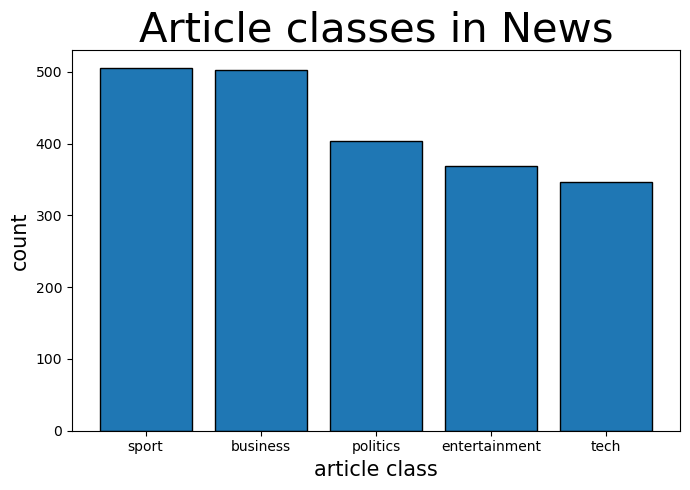

In [6]:
article_count = df.groupby('labels')['labels'].count().reset_index(name='count').sort_values(by='count',ascending=False)

plt.figure(figsize=(7,5))

plt.bar(data=article_count,x='labels',
        height='count' , edgecolor='black')

plt.xlabel('article class',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title('Article classes in News',fontsize=30)

plt.tight_layout()

# Data Preproccesing

In [7]:
text = df["text"]
text.head(2)

0    Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to 

In [8]:
category = df['labels']
category.head(10)

0    business
1    business
2    business
3    business
4    business
5    business
6    business
7    business
8    business
9    business
Name: labels, dtype: object

## Remove Tags function

In [9]:
import re
def remove_tags(text):
  remove = re.compile(r'')
  return re.sub(remove, '', text)
df['text'] = df['text'].apply(remove_tags)

In [10]:
df.head(2)

,text,labels
0,"Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL's existing customers for high-speed broadband. TimeWarner also has to restate 2000 and 2003 results following a probe by the US Securities Exchange Commission (SEC), which is close to concluding.\n\nTime Warner's fourth quarter profits were slightly better than analysts' expectations. But its film division saw profits slump 27% to $284m, helped by box-office flops Alexander and Catwoman, a sharp contrast to year-earlier, when the third and final film in the Lord of the Rings trilogy boosted results. For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09bn. ""Our financial performance was strong, meeting or exceeding all of our full-year objectives and greatly enhancing our flexibility,"" chairman and chief executive Richard Parsons said. For 2005, TimeWarner is projecting operating earnings growth of around 5%, and also expects higher revenue and wider profit margins.\n\nTimeWarner is to restate its accounts as part of efforts to resolve an inquiry into AOL by US market regulators. It has already offered to pay $300m to settle charges, in a deal that is under review by the SEC. The company said it was unable to estimate the amount it needed to set aside for legal reserves, which it previously set at $500m. It intends to adjust the way it accounts for a deal with German music publisher Bertelsmann's purchase of a stake in AOL Europe, which it had reported as advertising revenue. It will now book the sale of its stake in AOL Europe as a loss on the value of that stake.",business
1,"Dollar gains on Greenspan speech\n\nThe dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.\n\nAnd Alan Greenspan highlighted the US government's willingness to curb spending and rising household savings as factors which may help to reduce it. In late trading in New York, the dollar reached $1.2871 against the euro, from $1.2974 on Thursday. Market concerns about the deficit has hit the greenback in recent months. On Friday, Federal Reserve chairman Mr Greenspan's speech in London ahead of the meeting of G7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected US jobs data. ""I think the chairman's taking a much more sanguine view on the current account deficit than he's taken for some time,"" said Robert Sinche, head of currency strategy at Bank of America in New York. ""He's taking a longer-term view, laying out a set of conditions under which the current account deficit can improve this year and next.""\n\nWorries about the deficit concerns about China do, however, remain. China's currency remains pegged to the dollar and the US currency's sharp falls in recent months have therefore made Chinese export prices highly competitive. But calls for a shift in Beijing's policy have fallen on deaf ears, despite recent comments in a maj

## Remove special character function

In [11]:
def special_char(text):
  reviews = ''
  for x in text:
    if x.isalnum():
      reviews = reviews + x
    else:
      reviews = reviews + ' '
  return reviews
df['text'] = df['text'].apply(special_char)

In [12]:
df.head(2)

,text,labels
0,Ad sales boost Time Warner profit Quarterly profits at US media giant TimeWarner jumped 76 to 1 13bn 600m for the three months to December from 639m year earlier The firm which is now one of the biggest investors in Google benefited from sales of high speed internet connections and higher advert sales TimeWarner said fourth quarter sales rose 2 to 11 1bn from 10 9bn Its profits were buoyed by one off gains which offset a profit dip at Warner Bros and less users for AOL Time Warner said on Friday that it now owns 8 of search engine Google But its own internet business AOL had has mixed fortunes It lost 464 000 subscribers in the fourth quarter profits were lower than in the preceding three quarters However the company said AOL s underlying profit before exceptional items rose 8 on the back of stronger internet advertising revenues It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL s existing customers for high speed broadband TimeWarner also has to restate 2000 and 2003 results following a probe by the US Securities Exchange Commission SEC which is close to concluding Time Warner s fourth quarter profits were slightly better than analysts expectations But its film division saw profits slump 27 to 284m helped by box office flops Alexander and Catwoman a sharp contrast to year earlier when the third and final film in the Lord of the Rings trilogy boosted results For the full year TimeWarner posted a profit of 3 36bn up 27 from its 2003 performance while revenues grew 6 4 to 42 09bn Our financial performance was strong meeting or exceeding all of our full year objectives and greatly enhancing our flexibility chairman and chief executive Richard Parsons said For 2005 TimeWarner is projecting operating earnings growth of around 5 and also expects higher revenue and wider profit margins TimeWarner is to restate its accounts as part of efforts to resolve an inquiry into AOL by US market regulators It has already offered to pay 300m to settle charges in a deal that is under review by the SEC The company said it was unable to estimate the amount it needed to set aside for legal reserves which it previously set at 500m It intends to adjust the way it accounts for a deal with German music publisher Bertelsmann s purchase of a stake in AOL Europe which it had reported as advertising revenue It will now book the sale of its stake in AOL Europe as a loss on the value of that stake,business
1,Dollar gains on Greenspan speech The dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise And Alan Greenspan highlighted the US government s willingness to curb spending and rising household savings as factors which may help to reduce it In late trading in New York the dollar reached 1 2871 against the euro from 1 2974 on Thursday Market concerns about the deficit has hit the greenback in recent months On Friday Federal Reserve chairman Mr Greenspan s speech in London ahead of the meeting of G7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse than expected US jobs data I think the chairman s taking a much more sanguine view on the current account deficit than he s taken for some time said Robert Sinche head of currency strategy at Bank of America in New York He s taking a longer term view laying out a set of conditions under which the current account deficit can improve this year and next Worries about the deficit concerns about China do however remain China s currency remains pegged to the dollar and the US currency s sharp falls in recent months have therefore made Chinese export prices highly competitive But calls for a shift in Beijing s policy have fallen on deaf ears despite recent comments in a major Chinese newspaper that the time is ripe for a loosening of the peg The G7 meeting is thought unlikely to produce any mea

## Convert Characters to lower case function

In [13]:
def convert_lower(text):
   return text.lower()
df['text'] = df['text'].apply(convert_lower)

## Remove stopwords from text function

In [14]:
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  return [x for x in words if x not in stop_words]
df['text'] = df['text'].apply(remove_stopwords)

## Lemmatize the words function

In [15]:
def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])
df['text'] = df['text'].apply(lemmatize_word)

In [16]:
df.head(2)

,text,labels
0,ad sale boost time warner profit quarterly profit u medium giant timewarner jumped 76 1 13bn 600m three month december 639m year earlier firm one biggest investor google benefited sale high speed internet connection higher advert sale timewarner said fourth quarter sale rose 2 11 1bn 10 9bn profit buoyed one gain offset profit dip warner bros less user aol time warner said friday owns 8 search engine google internet business aol mixed fortune lost 464 000 subscriber fourth quarter profit lower preceding three quarter however company said aol underlying profit exceptional item rose 8 back stronger internet advertising revenue hope increase subscriber offering online service free timewarner internet customer try sign aol existing customer high speed broadband timewarner also restate 2000 2003 result following probe u security exchange commission sec close concluding time warner fourth quarter profit slightly better analyst expectation film division saw profit slump 27 284m helped box office flop alexander catwoman sharp contrast year earlier third final film lord ring trilogy boosted result full year timewarner posted profit 3 36bn 27 2003 performance revenue grew 6 4 42 09bn financial performance strong meeting exceeding full year objective greatly enhancing flexibility chairman chief executive richard parson said 2005 timewarner projecting operating earnings growth around 5 also expects higher revenue wider profit margin timewarner restate account part effort resolve inquiry aol u market regulator already offered pay 300m settle charge deal review sec company said unable estimate amount needed set aside legal reserve previously set 500m intends adjust way account deal german music publisher bertelsmann purchase stake aol europe reported advertising revenue book sale stake aol europe loss value stake,business
1,dollar gain greenspan speech dollar hit highest level euro almost three month federal reserve head said u trade deficit set stabilise alan greenspan highlighted u government willingness curb spending rising household saving factor may help reduce late trading new york dollar reached 1 2871 euro 1 2974 thursday market concern deficit hit greenback recent month friday federal reserve chairman mr greenspan speech london ahead meeting g7 finance minister sent dollar higher earlier tumbled back worse expected u job data think chairman taking much sanguine view current account deficit taken time said robert sinche head currency strategy bank america new york taking longer term view laying set condition current account deficit improve year next worry deficit concern china however remain china currency remains pegged dollar u currency sharp fall recent month therefore made chinese export price highly competitive call shift beijing policy fallen deaf ear despite recent comment major chinese newspaper time ripe loosening peg g7 meeting thought unlikely produce meaningful movement chinese policy meantime u federal reserve decision 2 february boost interest rate quarter point sixth move many month opened differential european rate half point window believe could enough keep u asset looking attractive could help prop dollar recent fall partly result big budget deficit well u yawning current account gap need funded buying u bond asset foreign firm government white house announce budget monday many commentator believe deficit remain close half trillion dollar,business


In [17]:
df['labels'].value_counts()

labels
sport            505
business         503
politics         403
entertainment    369
tech             347
Name: count, dtype: int64

# ML Modeling

In [18]:
X = df['text']
y = df['labels']
len(X)

2127

In [19]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [20]:
len(X_train)

1701

## Pipeline of different ML algorithms

In [21]:
pipeMNB = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,3))),('MNB', MultinomialNB())])
pipeCNB = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,3))),('CNB', ComplementNB())])
pipeSVC = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,3))),('SVC', LinearSVC())])

In [22]:
pipeMNB.fit(X_train,y_train)
predictMNB = pipeMNB.predict(X_test)

In [23]:
predictMNB
print(f'MNB : {accuracy_score(y_test,predictMNB):.2f}')

MNB : 0.95


## Test results for hyperparamets for best outcome

In [24]:
accuracy_score(y_test,predictMNB)

0.9460093896713615

In [25]:
pipeMNB.fit(X_train,y_train)
predictMNB = pipeMNB.predict(X_test)
print(f'MultinomialNB : {accuracy_score(y_test,predictMNB):.2f}')
pipeCNB.fit(X_train,y_train)
predictCNB = pipeCNB.predict(X_test)
print(f'ComplementNB : {accuracy_score(y_test,predictCNB):.2f}')
pipeSVC.fit(X_train,y_train)
predictSVC = pipeSVC.predict(X_test)
print(f'LinearSVC : {accuracy_score(y_test,predictSVC):.2f}')

MultinomialNB : 0.95
ComplementNB : 0.97
LinearSVC : 0.98


In [26]:
print(classification_report(y_test, predictSVC))

               precision    recall  f1-score   support

     business       0.99      0.96      0.98       104
entertainment       0.99      0.94      0.96        78
     politics       0.95      1.00      0.97        73
        sport       1.00      1.00      1.00        98
         tech       0.95      0.99      0.97        73

     accuracy                           0.98       426
    macro avg       0.97      0.98      0.98       426
 weighted avg       0.98      0.98      0.98       426



# Test some examples to see how model predicts

In [27]:
text = 'Google announced its latest AI-powered search engine upgrade, claiming it will revolutionize search results.'

predict = pipeSVC.predict([text])

print(predict)

['tech']


In [28]:
# Example texts for testing
test_texts = [
    "Stock markets in Europe are recovering after a week of losses triggered by inflation concerns.",
    "Apple is rumored to unveil its first mixed-reality headset at the upcoming conference.",
    "The government passed a new healthcare bill aimed at reducing the cost of medical services.",
    "Novak Djokovic clinched another Grand Slam title in a thrilling final match.",
    "Marvel Studios announced the next phase of its cinematic universe with new heroes and storylines."
]

# Transform and predict for each example
predictions = pipeSVC.predict(test_texts)
for txt, text in zip(test_texts, predictions):
    print(f"» {text.upper():11} : {txt}")

» BUSINESS    : Stock markets in Europe are recovering after a week of losses triggered by inflation concerns.
» TECH        : Apple is rumored to unveil its first mixed-reality headset at the upcoming conference.
» POLITICS    : The government passed a new healthcare bill aimed at reducing the cost of medical services.
» SPORT       : Novak Djokovic clinched another Grand Slam title in a thrilling final match.
» ENTERTAINMENT : Marvel Studios announced the next phase of its cinematic universe with new heroes and storylines.
